In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Text(0, 0.5, 'intensity')

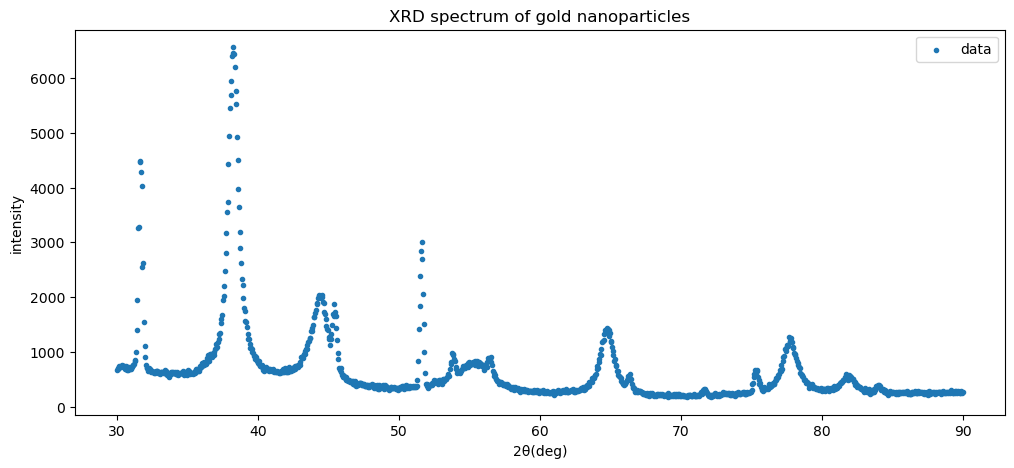

In [2]:
data = np.loadtxt('gixrd_scan05_om0p6_th30-90_G1.xy')
theta_2=data[:,0]
intensity=data[:,1]
plt.figure(figsize=(12, 5))
plt.scatter(theta_2,intensity,label="data",marker=".")
plt.legend()
plt.title("XRD spectrum of gold nanoparticles")
plt.xlabel("2θ(deg)")
plt.ylabel("intensity")


In [6]:
def select_angle(angle1,angle2):
        i=1
        j=1
        while theta_2[i]<angle1:
            i=i+1

        angle1=i

        while theta_2[i]<angle2:
            i=i+1

        angle2=i

        return angle1,angle2


# Gaussian and Lorentzian components
def gaussian(x, amplitude, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return amplitude * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

def lorentzian(x, amplitude, center, fwhm):
    gamma = fwhm / 2
    return amplitude * (gamma**2 / ((x - center)**2 + gamma**2))

# Pseudo-Voigt profile
def pseudo_voigt(x, amplitude, center, fwhm, eta):
    return eta * lorentzian(x, amplitude, center, fwhm) + \
           (1 - eta) * gaussian(x, amplitude, center, fwhm)


#double Pseudo-Voigt
def double_pseudo_voigt(x, amplitude1, center1, fwhm1, eta1, amplitude2, center2, fwhm2):
    return eta1 * lorentzian(x, amplitude1, center1, fwhm1) + (1 - eta1) * gaussian(x, amplitude1, center1, fwhm1) + \
           lorentzian(x, amplitude2, center2, fwhm2) 

#constants useful for the analysis
lam = 0.15406e-9  #incident wavelength

Fitted parameters:
  Amplitude = 5794.4326
  Center    = 38.2577
  FWHM      = 0.8446
  Eta       = 0.5522


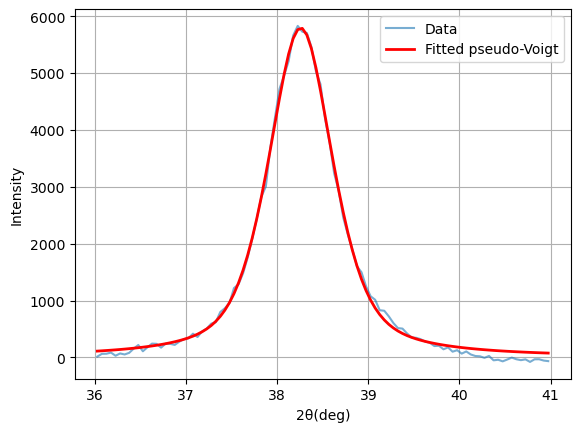

Possible parameters:
lattice constant =  4.0714819197100207e-10
n =  1
h =  1
k =  1
l =  1
 
Radius of the nanoparticles = 7.234999203951725e-09
Error center 0.0023549041299553227
Error FWHM 0.007907526138057834


In [7]:
#select the anlge range to fit
ang1,ang2=select_angle(36,41)

x_data =  theta_2[ang1 : ang2]
y_data = intensity[ang1 : ang2]

#subtruct a constant background
y_data = y_data - 730.0

# Initial parameter guesses: [amplitude, center, fwhm, eta]
initial_guess = [6348.2691, 38.2588, 1.0348, 1.0000]

# Curve fitting
popt, pcov = curve_fit(pseudo_voigt, x_data, y_data, p0=initial_guess, bounds=([0, -np.inf, 0, 0], [np.inf, np.inf, np.inf, 1]))

# Extract fitted parameters
amplitude_fit, center_fit, fwhm_fit, eta_fit = popt
print("Fitted parameters:")
print(f"  Amplitude = {amplitude_fit:.4f}")
print(f"  Center    = {center_fit:.4f}")
print(f"  FWHM      = {fwhm_fit:.4f}")
print(f"  Eta       = {eta_fit:.4f}")

# Plotting
y_fit = pseudo_voigt(x_data, *popt)

plt.plot(x_data, y_data, label='Data', alpha=0.6)
plt.plot(x_data, y_fit, label='Fitted pseudo-Voigt', color='red', linewidth=2)
plt.legend()
plt.xlabel("2θ(deg)")
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


theta=center_fit*np.pi/180 #convert angle to rad

# search the planes that have scattered the x-rays

for n in range (1 , 4):
    for h in range(0, 4):
        for k in range(0, 4):
            for l in range(0, 4):
                a = np.sqrt((h)**2+(k)**2+(l)**2)*(n*lam)/(2*np.sin(theta/2)) #latttice constant

                if (a<4.2e-10 and a>4e-10) :    #if the lattice constant is close to the reference one keep the parameters
                    print("Possible parameters:")
                    print("lattice constant = ", a)
                    print("n = ", n)
                    print("h = ", h)
                    print("k = ", k)
                    print("l = ", l)
                    print(" ")
#estimation of the radius of the nanoparticles
                    
beta=np.sqrt(fwhm_fit**2-0.27**2)*np.pi/(180) 
beta=(fwhm_fit-0.27)*np.pi/(180)   
D_v = 0.89*lam/(beta*np.cos(theta/2))
print(f"Radius of the nanoparticles = {D_v/2}")

print("Error center",np.sqrt(pcov[1,1]))
print("Error FWHM",np.sqrt(pcov[2,2]))
                   

Fitted parameters:
  Amplitude = 1403.1325
  Center    = 44.4018
  FWHM      = 1.3042
  Eta       = 0.7045


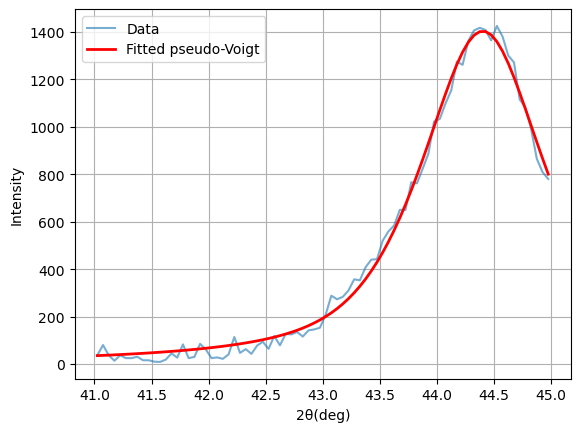

Possible parameters : 
lattice constant =  4.07722161498116e-10
n =  1
h =  0
k =  0
l =  2

Possible parameters : 
lattice constant =  4.07722161498116e-10
n =  1
h =  0
k =  2
l =  0

Possible parameters : 
lattice constant =  4.07722161498116e-10
n =  1
h =  2
k =  0
l =  0

Possible parameters : 
lattice constant =  4.07722161498116e-10
n =  2
h =  0
k =  0
l =  1

Possible parameters : 
lattice constant =  4.07722161498116e-10
n =  2
h =  0
k =  1
l =  0

Possible parameters : 
lattice constant =  4.07722161498116e-10
n =  2
h =  1
k =  0
l =  0

Radius of the nanoparticles = 4.102180530575097e-09
Error center 0.006419358674430471
Error FWHM 0.02476033902033247


In [8]:
#double Pseudo-Voigt
def double_pseudo_voigt(x, amplitude1, center1, fwhm1, eta1, amplitude2, center2, fwhm2, eta2):
    return eta1 * lorentzian(x, amplitude1, center1, fwhm1) + (1 - eta1) * gaussian(x, amplitude1, center1, fwhm1) + \
        eta2 * lorentzian(x, amplitude2, center2, fwhm2) + (1 - eta2) * gaussian(x, amplitude2, center2, fwhm2) 
           
#select the anlge range to fit
ang1,ang2=select_angle(41,45)

x_data =  theta_2[ang1 : ang2]

y_data = intensity[ang1 : ang2]

#def backg(x_data,dg1,dg2,a1,a2):
x1=x_data<43
x2=x_data>45
x3=~(x1+x2)
         

    

#back=600 -(x_data-41)*300/(49-46)
y_data = y_data - 615

# Initial parameter guesses: [amplitude, center, fwhm, eta]
initial_guess = [1048.2691, 44.2588, 1.0348, 1.0000,1150.00,45.45,0.4,0.1]
# Curve fitting
popt, pcov = curve_fit(double_pseudo_voigt, x_data, y_data, p0=initial_guess, bounds=([0, -np.inf, 0, 0,0, -np.inf, 0, 0], [np.inf, np.inf, np.inf, 1,np.inf, np.inf, np.inf, 1]))

# Extract fitted parameters
amplitude_fit1, center_fit1, fwhm_fit1, eta_fit1, amplitude_fit2, center_fit2, fwhm_fit2, eta_fit2 = popt
print("Fitted parameters:")
print(f"  Amplitude = {amplitude_fit1:.4f}")
print(f"  Center    = {center_fit1:.4f}")
print(f"  FWHM      = {fwhm_fit1:.4f}")
print(f"  Eta       = {eta_fit1:.4f}")

# Plotting
y_fit = double_pseudo_voigt(x_data, *popt)

plt.plot(x_data, y_data, label='Data', alpha=0.6)
plt.plot(x_data, y_fit, label='Fitted pseudo-Voigt', color='red', linewidth=2)
plt.legend()
plt.xlabel("2θ(deg)")
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


theta=center_fit1*np.pi/180
for n in range (1 , 4):
    for h in range(0, 7):
        for k in range(0, 7):
            for l in range(0, 7):
                a = np.sqrt((h)**2+(k)**2+(l)**2)*(n*lam)/(2*np.sin(theta/2))
                if (a<4.2e-10 and a>4e-10) :
                    print("Possible parameters : ")
                    print("lattice constant = ", a)
                    print("n = ", n)
                    print("h = ", h)
                    print("k = ", k)
                    print("l = ", l)
                    print("")

#estimation of the radius of the nanoparticles

beta=np.sqrt(fwhm_fit1**2-0.27**2)*np.pi/(180)    
beta=(fwhm_fit1-0.27)*np.pi/(180)    
D_v = 0.89*lam/(beta*np.cos(theta/2))
print(f"Radius of the nanoparticles = {D_v/2}")
                   
print("Error center",np.sqrt(pcov[1,1]))
print("Error FWHM",np.sqrt(pcov[2,2]))

Fitted parameters:
  Amplitude = 1238.2439
  Center    = 64.7578
  FWHM      = 1.1723
  Eta       = 1.0000


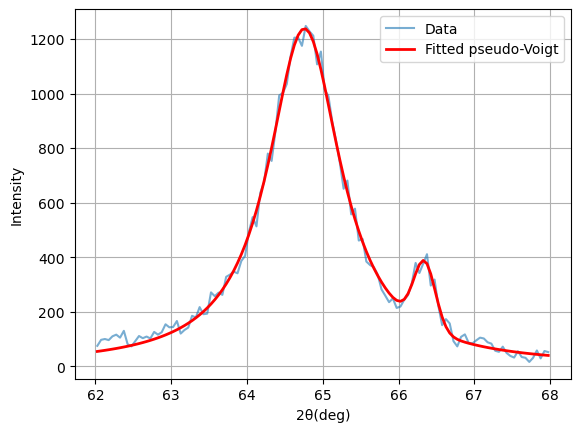

Possible parameters : 
lattice constant =  4.0684864050848e-10
n =  1
h =  0
k =  2
l =  2

Possible parameters : 
lattice constant =  4.0684864050848e-10
n =  1
h =  2
k =  0
l =  2

Possible parameters : 
lattice constant =  4.0684864050848e-10
n =  1
h =  2
k =  2
l =  0

Possible parameters : 
lattice constant =  4.0684864050848e-10
n =  2
h =  0
k =  1
l =  1

Possible parameters : 
lattice constant =  4.0684864050848e-10
n =  2
h =  1
k =  0
l =  1

Possible parameters : 
lattice constant =  4.0684864050848e-10
n =  2
h =  1
k =  1
l =  0

Radius of the nanoparticles = 5.1545140993031734e-09
Error center 0.004587747219340314
Error FWHM 0.017704928884932063


In [9]:
#select the anlge range to fit
ang1,ang2=select_angle(62,68)

x_data =  theta_2[ang1 : ang2]

y_data = intensity[ang1 : ang2]
y_data = y_data - 190.0

# Initial parameter guesses: [amplitude, center, fwhm, eta]
initial_guess = [1211.5570, 64.7648, 1.1781, 1.0000,400,66.5,0.4,0.1]
# Curve fitting
popt, pcov = curve_fit(double_pseudo_voigt, x_data, y_data, p0=initial_guess, bounds=([0, -np.inf, 0, 0,0, -np.inf, 0, 0], [np.inf, np.inf, np.inf, 1,np.inf, np.inf, np.inf, 1]))

# Extract fitted parameters
amplitude_fit1, center_fit1, fwhm_fit1, eta_fit1, amplitude_fit2, center_fit2, fwhm_fit2, eta_fit2 = popt
print("Fitted parameters:")
print(f"  Amplitude = {amplitude_fit1:.4f}")
print(f"  Center    = {center_fit1:.4f}")
print(f"  FWHM      = {fwhm_fit1:.4f}")
print(f"  Eta       = {eta_fit1:.4f}")

# Plotting
y_fit = double_pseudo_voigt(x_data, *popt)

plt.plot(x_data, y_data, label='Data', alpha=0.6)
plt.plot(x_data, y_fit, label='Fitted pseudo-Voigt', color='red', linewidth=2)
plt.legend()
plt.xlabel("2θ(deg)")
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

theta=center_fit1*np.pi/180
for n in range (1 , 4):
    for h in range(0, 7):
        for k in range(0, 7):
            for l in range(0, 7):
                a = np.sqrt((h)**2+(k)**2+(l)**2)*(n*lam)/(2*np.sin(theta/2))
                if (a<4.1e-10 and a>4e-10) :
                    print("Possible parameters : ")
                    print("lattice constant = ", a)
                    print("n = ", n)
                    print("h = ", h)
                    print("k = ", k)
                    print("l = ", l)
                    print("")

#estimation of the radius of the nanoparticles

beta=np.sqrt(fwhm_fit1**2-0.27**2)*np.pi/(180)     
beta=(fwhm_fit1-0.27)*np.pi/(180)   
D_v = 0.89*lam/(beta*np.cos(theta/2))
print(f"Radius of the nanoparticles = {D_v/2}")

print("Error center",np.sqrt(pcov[1,1]))
print("Error FWHM",np.sqrt(pcov[2,2]))

Fitted parameters:
  Amplitude = 1002.0690
  Center    = 77.7318
  FWHM      = 1.2807
  Eta       = 1.0000


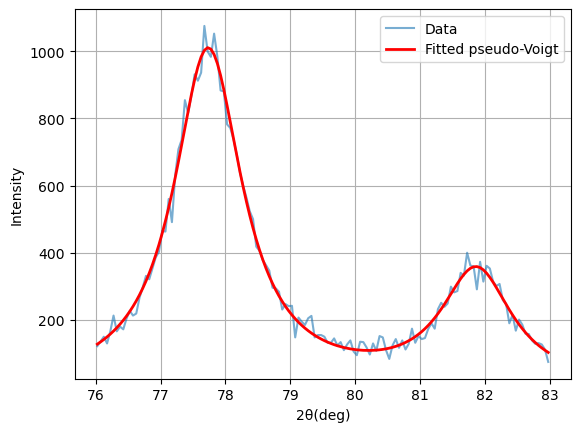

Possible parameters : 
lattice constant =  4.0727678356778843e-10
n =  1
h =  2
k =  2
l =  2

Possible parameters : 
lattice constant =  4.0727678356778843e-10
n =  2
h =  1
k =  1
l =  1

Radius of the nanoparticles = 3.999870550731119e-09
Error center 0.0638709402674315
Error FWHM 0.1592318255724288


In [17]:
#select the anlge range to fit
ang1,ang2=select_angle(76,83)

x_data =  theta_2[ang1 : ang2]

y_data = intensity[ang1 : ang2]
y_data = y_data - 200

# Initial parameter guesses: [amplitude, center, fwhm, eta]
initial_guess = [930.1198, 77.7389, 1.6387, 1.0000,400,82,0.4,0.1]
# Curve fitting
popt, pcov = curve_fit(double_pseudo_voigt, x_data, y_data, p0=initial_guess, bounds=([0, -np.inf, 0, 0,0, -np.inf, 0, 0], [np.inf, np.inf, np.inf, 1,np.inf, np.inf, np.inf, 1]))

# Extract fitted parameters
amplitude_fit1, center_fit1, fwhm_fit1, eta_fit1, amplitude_fit2, center_fit2, fwhm_fit2, eta_fit2 = popt
print("Fitted parameters:")
print(f"  Amplitude = {amplitude_fit1:.4f}")
print(f"  Center    = {center_fit1:.4f}")
print(f"  FWHM      = {fwhm_fit1:.4f}")
print(f"  Eta       = {eta_fit1:.4f}")

# Plotting
y_fit = double_pseudo_voigt(x_data, *popt)

plt.plot(x_data, y_data, label='Data', alpha=0.6)
plt.plot(x_data, y_fit, label='Fitted pseudo-Voigt', color='red', linewidth=2)
plt.legend()
plt.xlabel("2θ(deg)")
plt.ylabel('Intensity')
plt.grid(True)
plt.show()


theta=center_fit2*np.pi/180

for n in range (1 , 4):
    for h in range(0, 7):
        for k in range(0, 7):
            for l in range(0, 7):
                a = np.sqrt((h)**2+(k)**2+(l)**2)*(n*lam)/(2*np.sin(theta/2))
                if (a<4.1e-10 and a>4e-10) :
                    print("Possible parameters : ")
                    print("lattice constant = ", a)
                    print("n = ", n)
                    print("h = ", h)
                    print("k = ", k)
                    print("l = ", l)
                    print("")

#estimation of the radius of the nanoparticles

beta=np.sqrt(fwhm_fit2**2-0.27**2)*np.pi/(180)    
#beta=(fwhm_fit2-0.27)*np.pi/(180)    
D_v = 0.89*lam/(beta*np.cos(theta/2))
print(f"Radius of the nanoparticles = {D_v/2}")

print("Error center",np.sqrt(pcov[6,6]))
print("Error FWHM",np.sqrt(pcov[7,7]))